<a href="https://colab.research.google.com/github/Masoud0389/Steady_State/blob/main/lstm_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
#pip install git+https://github.com/Kaggle/learntools.git

In [94]:
# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system

from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex6 import *

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, normalize
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import warnings
import numpy as np
warnings.filterwarnings('ignore')
data = pd.read_csv('DATASET1.csv')
#data.info()

In [96]:
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,load,weakdays,season,label
0,1,0.99833,0.99057,0.98682,0.98319,0.97557,0.97521,0.97276,0.97097,0.96949,...,0.96900,0.96591,0.96443,0.96483,0.96541,0.96693,0.67977,1,1,0
1,1,0.99834,0.99066,0.98695,0.98336,0.97583,0.97549,0.97307,0.97131,0.96986,...,0.96935,0.96630,0.96484,0.96527,0.96584,0.96737,0.67443,1,1,0
2,1,0.99834,0.99066,0.98695,0.98335,0.97582,0.97548,0.97306,0.97130,0.96985,...,0.96933,0.96629,0.96483,0.96525,0.96583,0.96736,0.67463,1,1,0
3,1,0.99832,0.99056,0.98681,0.98317,0.97554,0.97518,0.97272,0.97093,0.96944,...,0.96896,0.96586,0.96438,0.96478,0.96536,0.96688,0.68036,1,1,0
4,1,0.99829,0.99037,0.98653,0.98281,0.97497,0.97457,0.97207,0.97020,0.96865,...,0.96822,0.96503,0.96351,0.96387,0.96443,0.96596,0.69162,1,1,0


In [97]:
#data.isna().sum()

In [98]:
#data.season.value_counts()/96

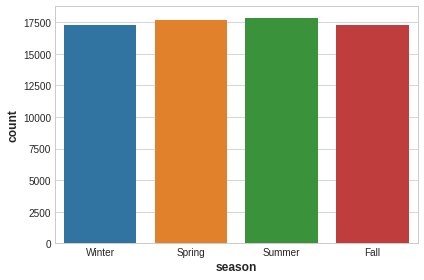

In [99]:
g = sns.countplot(data['season'])
g.set_xticklabels(['Winter','Spring', 'Summer', 'Fall'])
plt.show()

In [100]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X = StandardScaler().fit_transform(X)
X = normalize(X, norm="max")

In [101]:
#pip install tab2img

In [102]:
# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)
input_shape = [X_train.shape[1]]
print(X_train.shape)

(52560, 36)


In [103]:
from tensorflow import keras
from keras.layers import Layer, Dense, Flatten, LSTM, SimpleRNN, Dropout
from keras import backend as K
from keras import layers
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid', name='foo'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 36, 128)           66560     
                                                                 
 dropout_3 (Dropout)         (None, 36, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 foo (Dense)                 (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [105]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.0001,
    restore_best_weights=True,
)

In [106]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
103/103 [==============================] - 29s 257ms/step - loss: 0.6282 - binary_accuracy: 0.6209 - val_loss: 0.5172 - val_binary_accuracy: 0.7059
Epoch 2/200
103/103 [==============================] - 26s 253ms/step - loss: 0.5391 - binary_accuracy: 0.6898 - val_loss: 0.4911 - val_binary_accuracy: 0.7108
Epoch 3/200
103/103 [==============================] - 26s 253ms/step - loss: 0.4610 - binary_accuracy: 0.7208 - val_loss: 0.4291 - val_binary_accuracy: 0.7293
Epoch 4/200
103/103 [==============================] - 26s 252ms/step - loss: 0.4501 - binary_accuracy: 0.7230 - val_loss: 0.4498 - val_binary_accuracy: 0.7236
Epoch 5/200
103/103 [==============================] - 26s 250ms/step - loss: 0.4380 - binary_accuracy: 0.7251 - val_loss: 0.4283 - val_binary_accuracy: 0.7273
Epoch 6/200
103/103 [==============================] - 26s 252ms/step - loss: 0.4542 - binary_accuracy: 0.7124 - val_loss: 0.5029 - val_binary_accuracy: 0.7217
Epoch 7/200
103/103 [===================

548/548 [==============================] - 12s 21ms/step


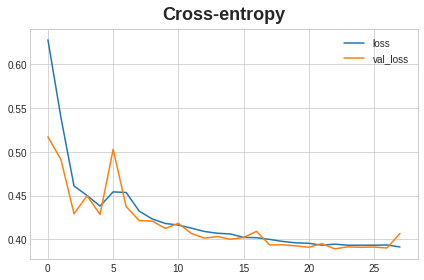

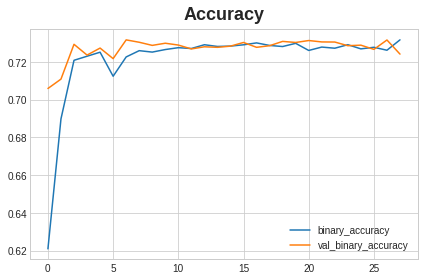

In [111]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
y_pred = model.predict(X_valid).round()

In [108]:
#pip install tensorflow-addons

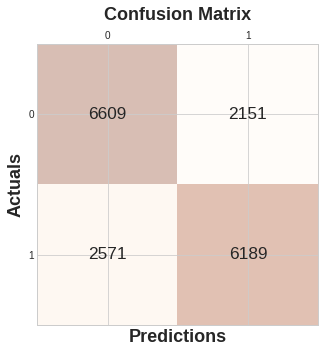

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [113]:
print(f"f1_score is:{f1_score(y_valid, y_pred, average='binary')}\n accuracy_score is: {accuracy_score(y_valid, y_pred)}\n precision is: {precision_score(y_valid, y_pred)}\n recal is: {recall_score(y_valid, y_pred)}") 

f1_score is:0.723859649122807
 accuracy_score is: 0.7304794520547945
 precision is: 0.7420863309352518
 recal is: 0.7065068493150685
